In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/heart.csv')

In [5]:
df.head

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
duplicate=df[df.duplicated()]
print("Duplicate rows:")
duplicate

Duplicate rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(302, 14)

In [10]:
#Get Target data 
y = df['target']

#Load X Variables into a Pandas Dataframe with columns 
X = df.drop(['target'], axis = 1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [12]:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (241, 13)
y_train : (241,)
X_test : (61, 13)
y_test : (61,)


In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
print (f'Train Accuracy - : {dtree.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {dtree.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.689


This is a case of overfitting

TUNING THE HYPERPARAMETERS

In [21]:
from sklearn.tree import plot_tree

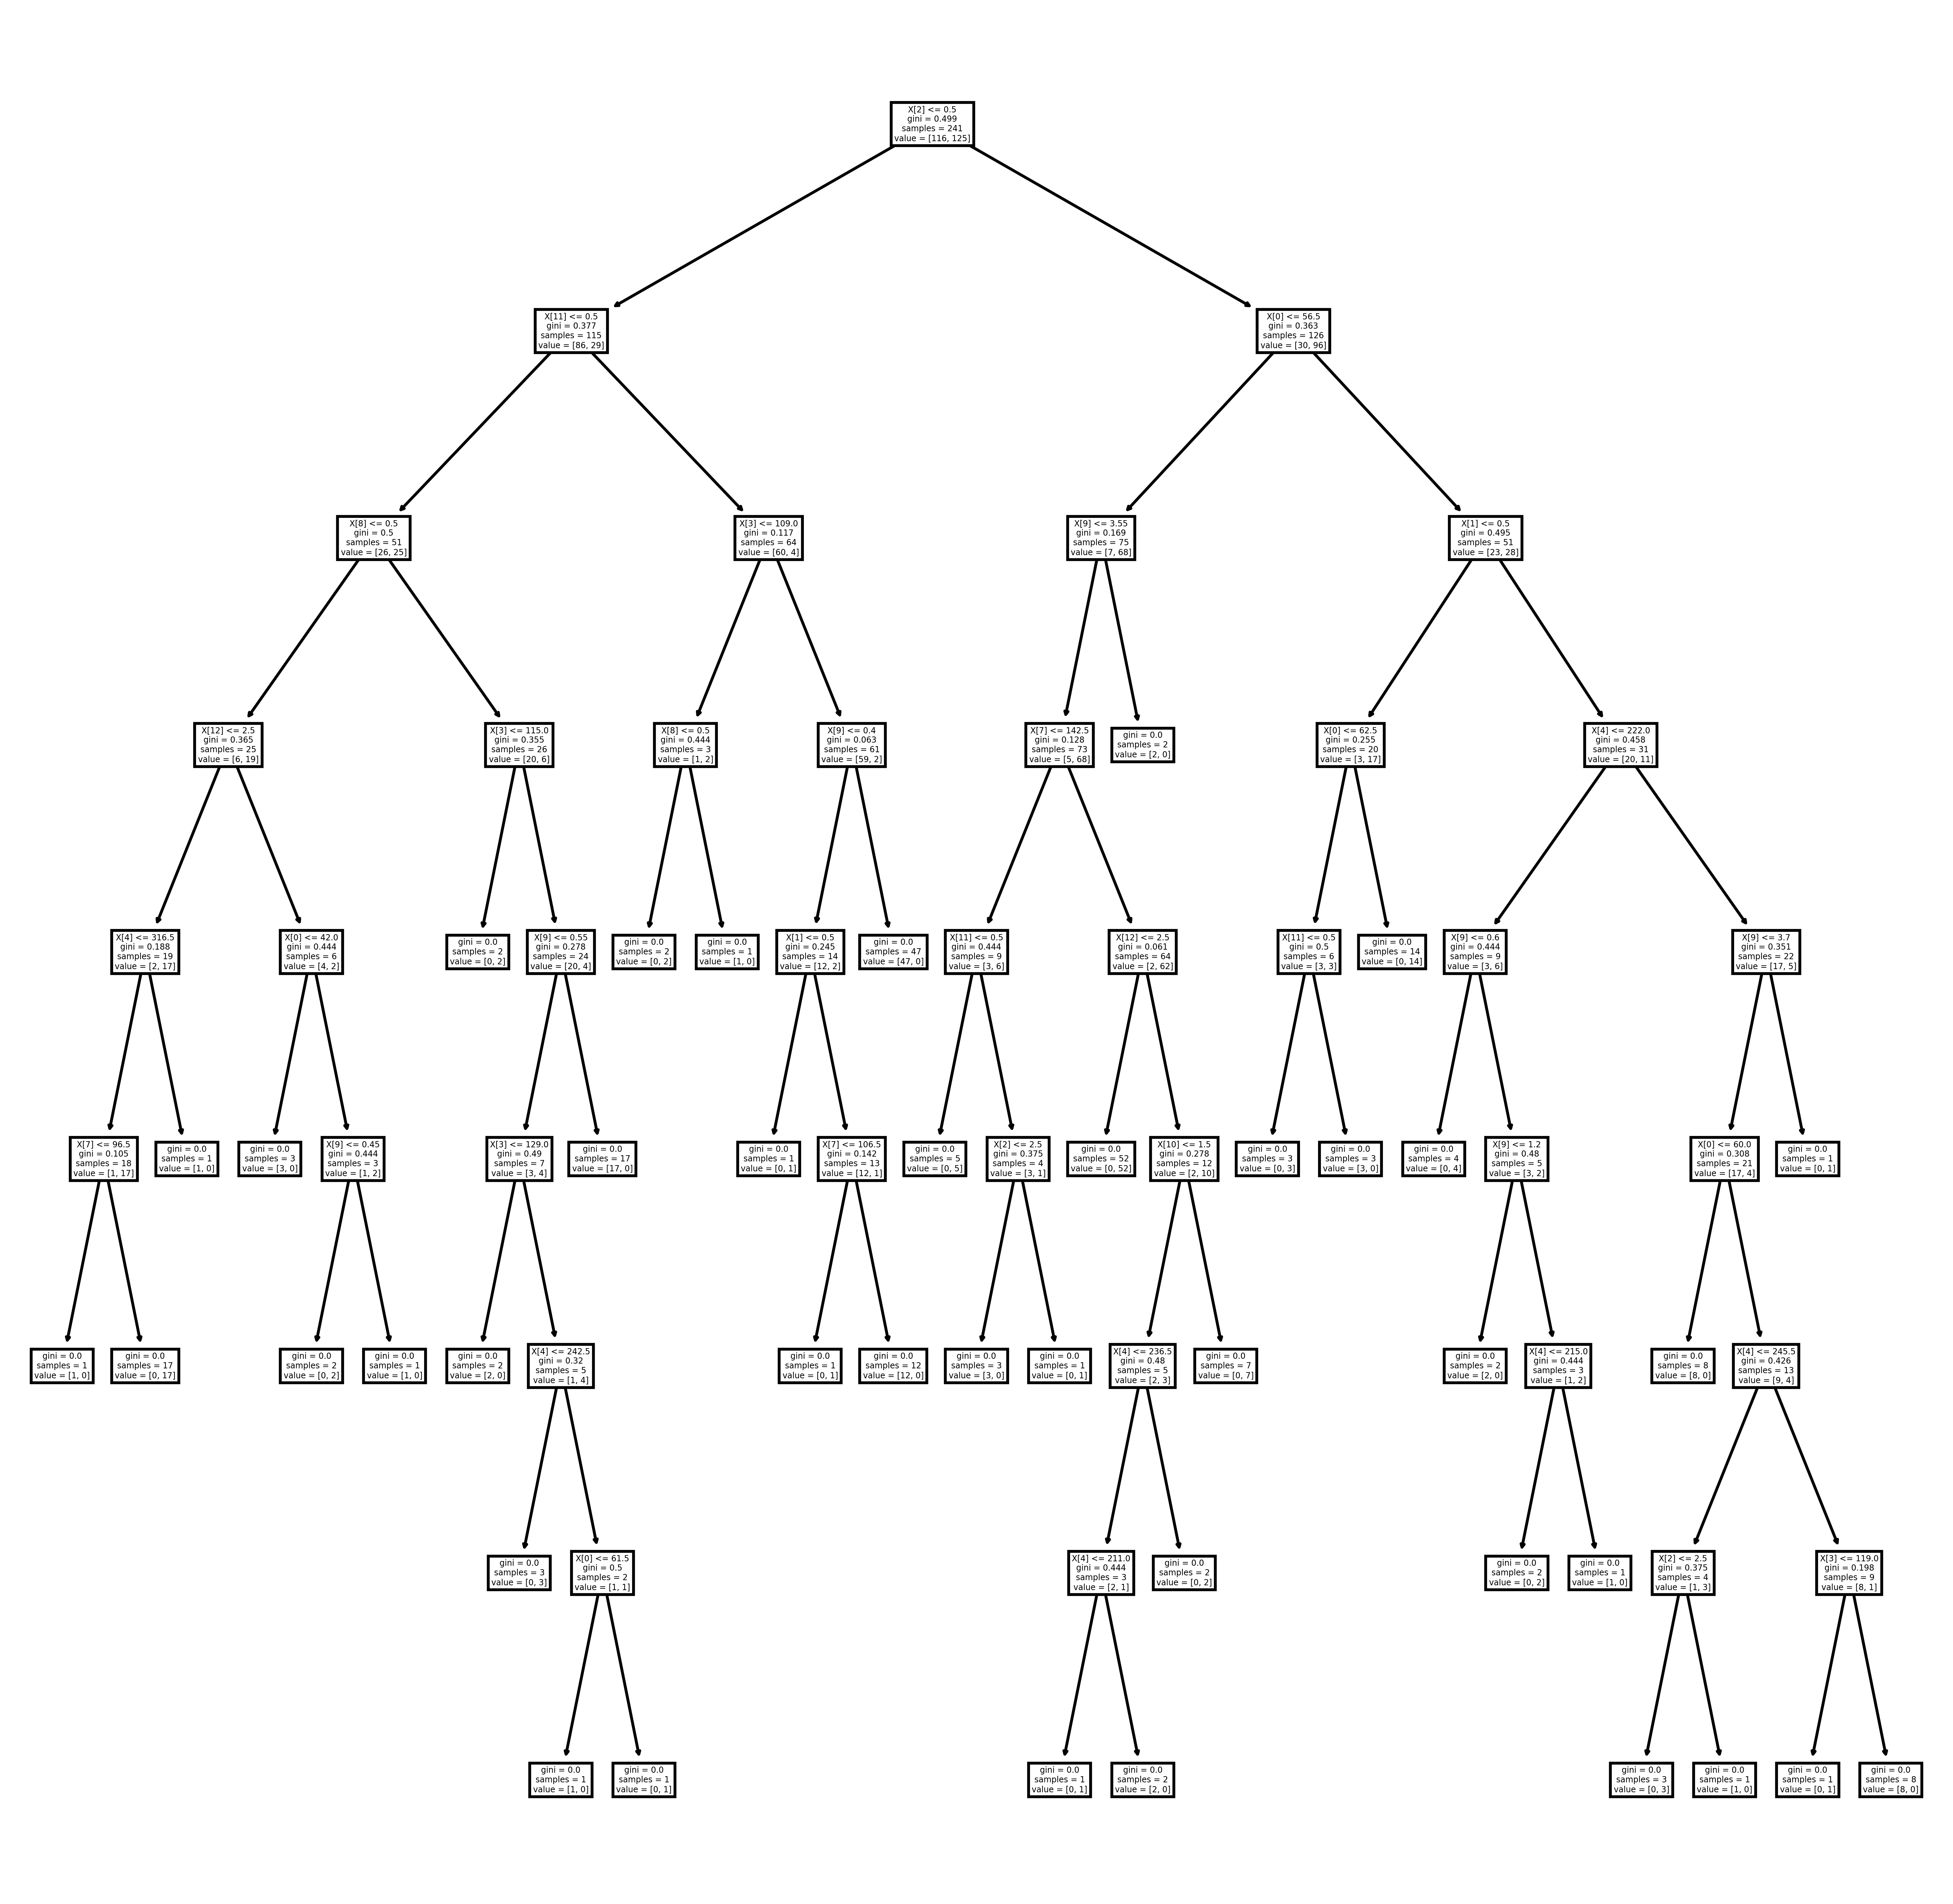

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12),dpi=600)
plot_tree(dtree);

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [20]:
print (f'Train Accuracy - : {dtree.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {dtree.score(X_test,y_test):.3f}')

Train Accuracy - : 0.892
Test Accuracy - : 0.721


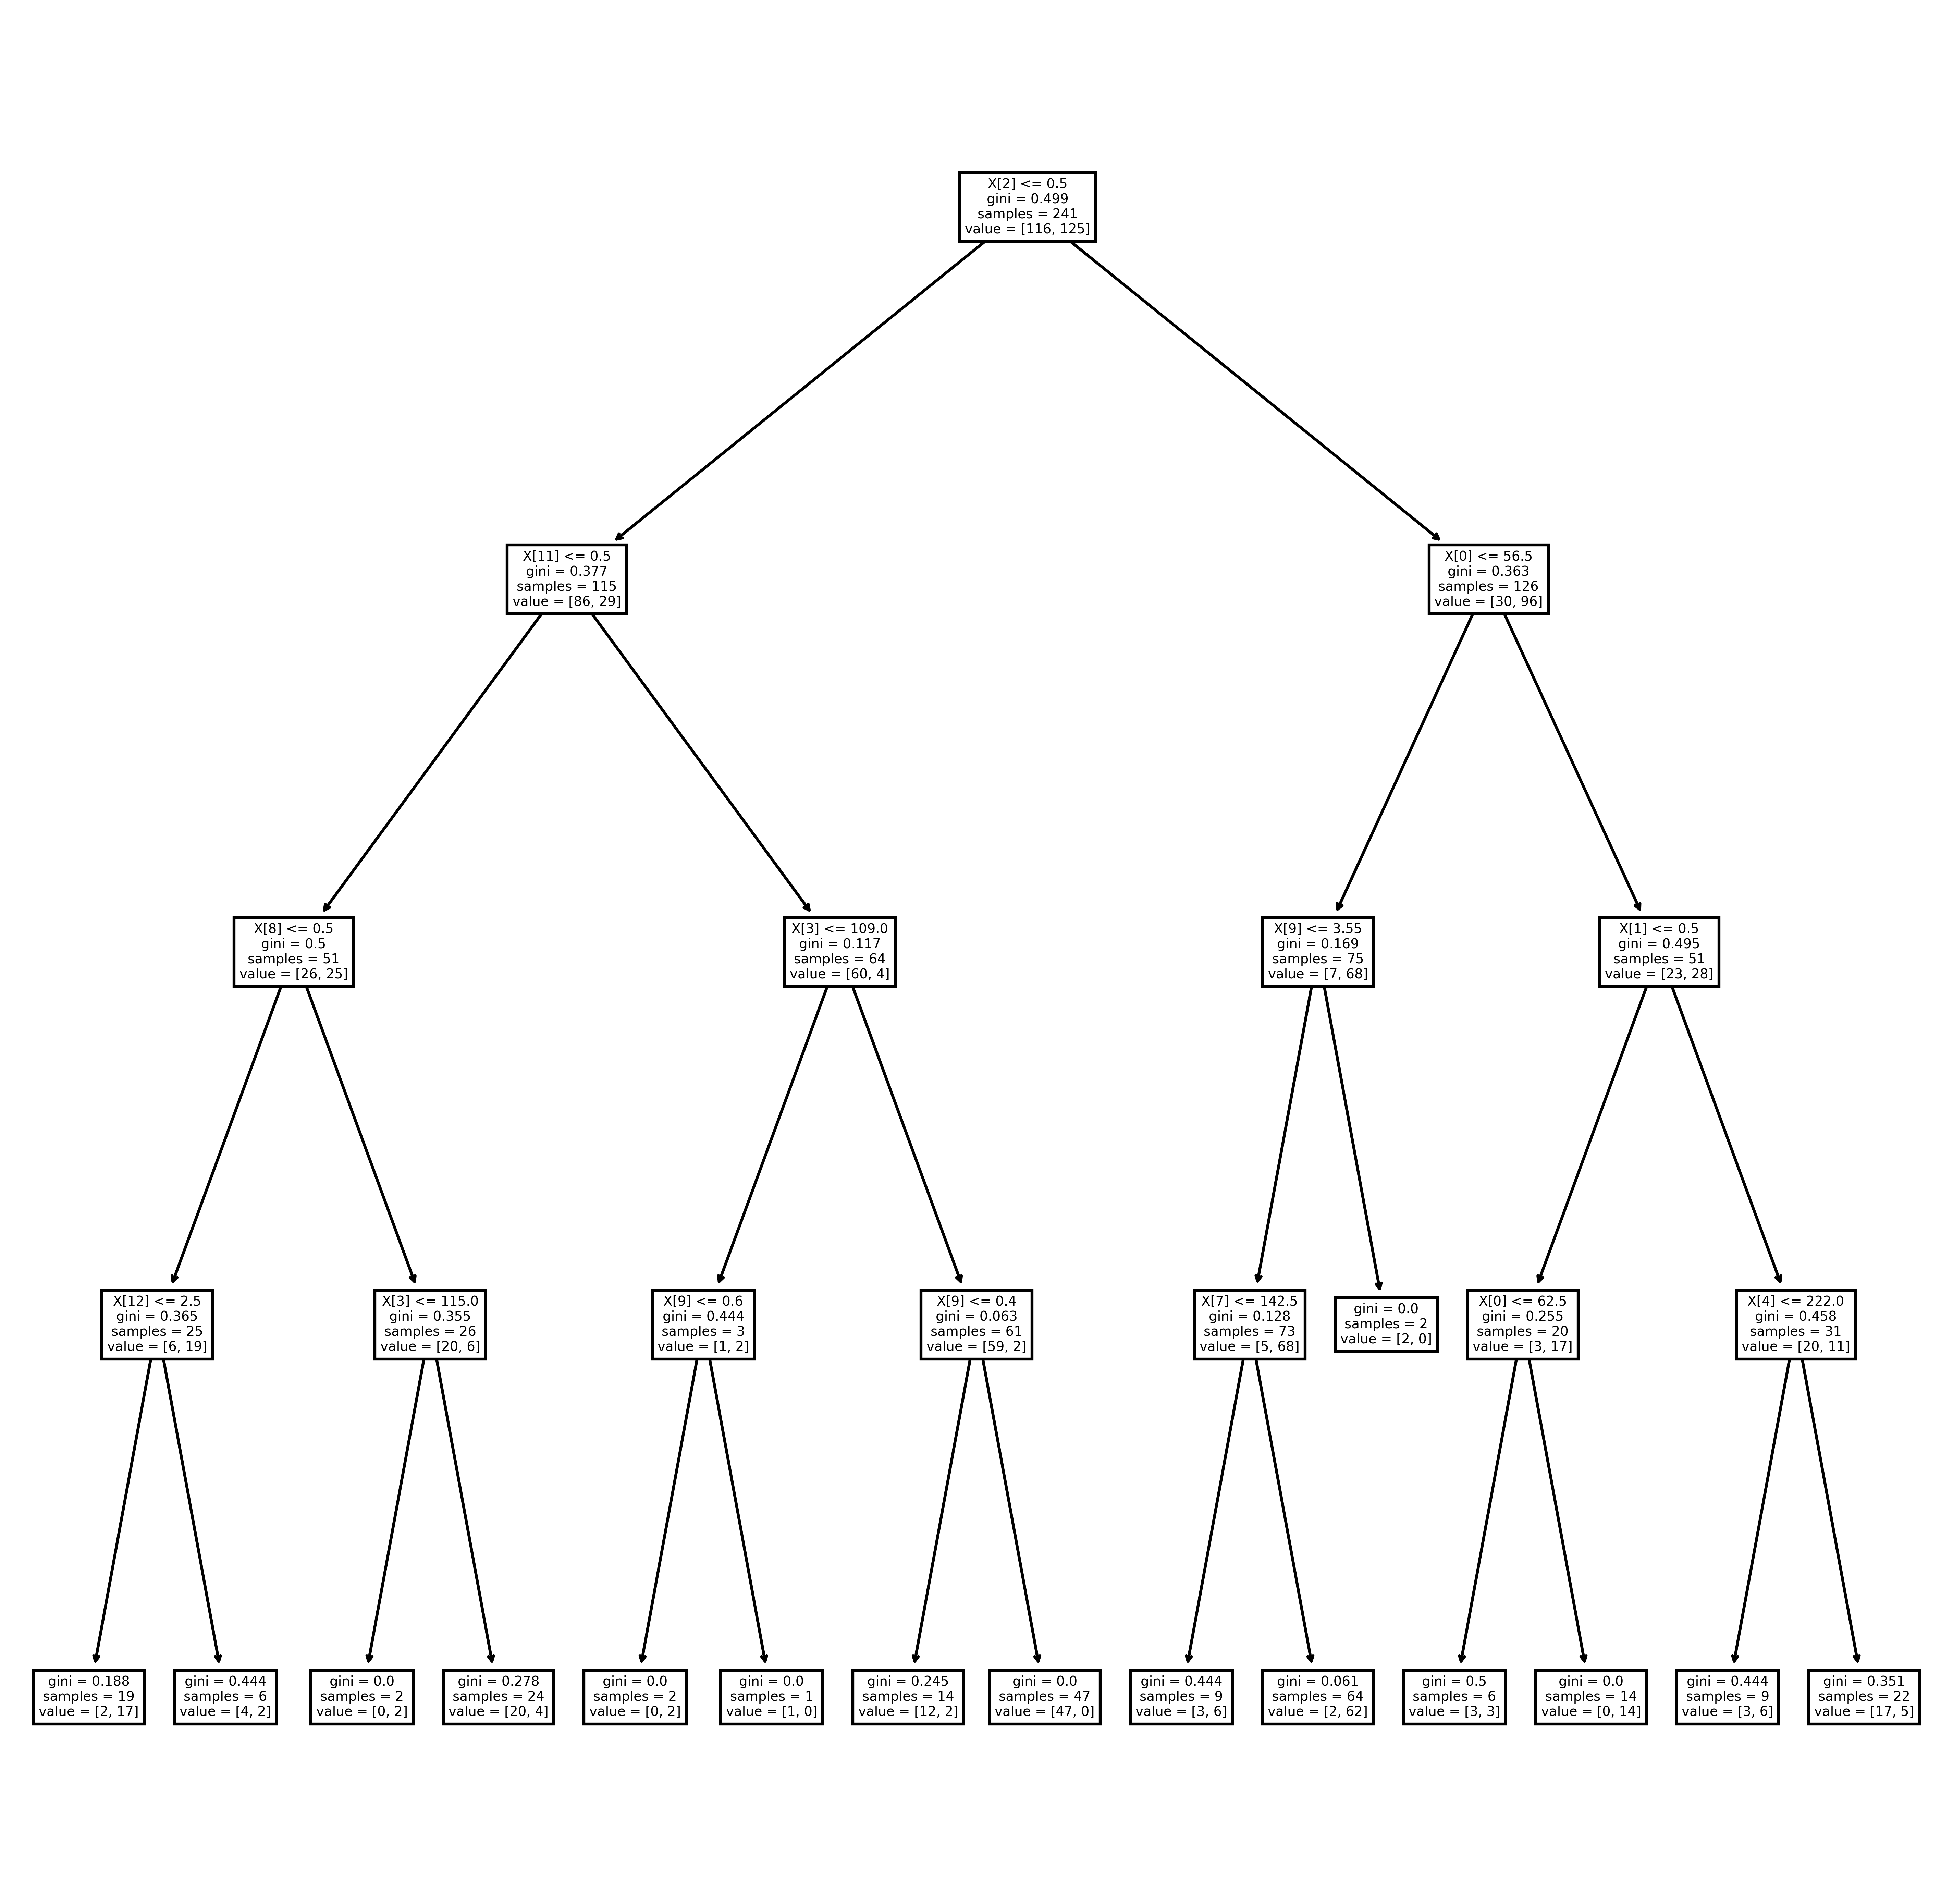

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12),dpi=600)
plot_tree(dtree);

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
print (f'Train Accuracy - : {dtree.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {dtree.score(X_test,y_test):.3f}')

Train Accuracy - : 0.859
Test Accuracy - : 0.721


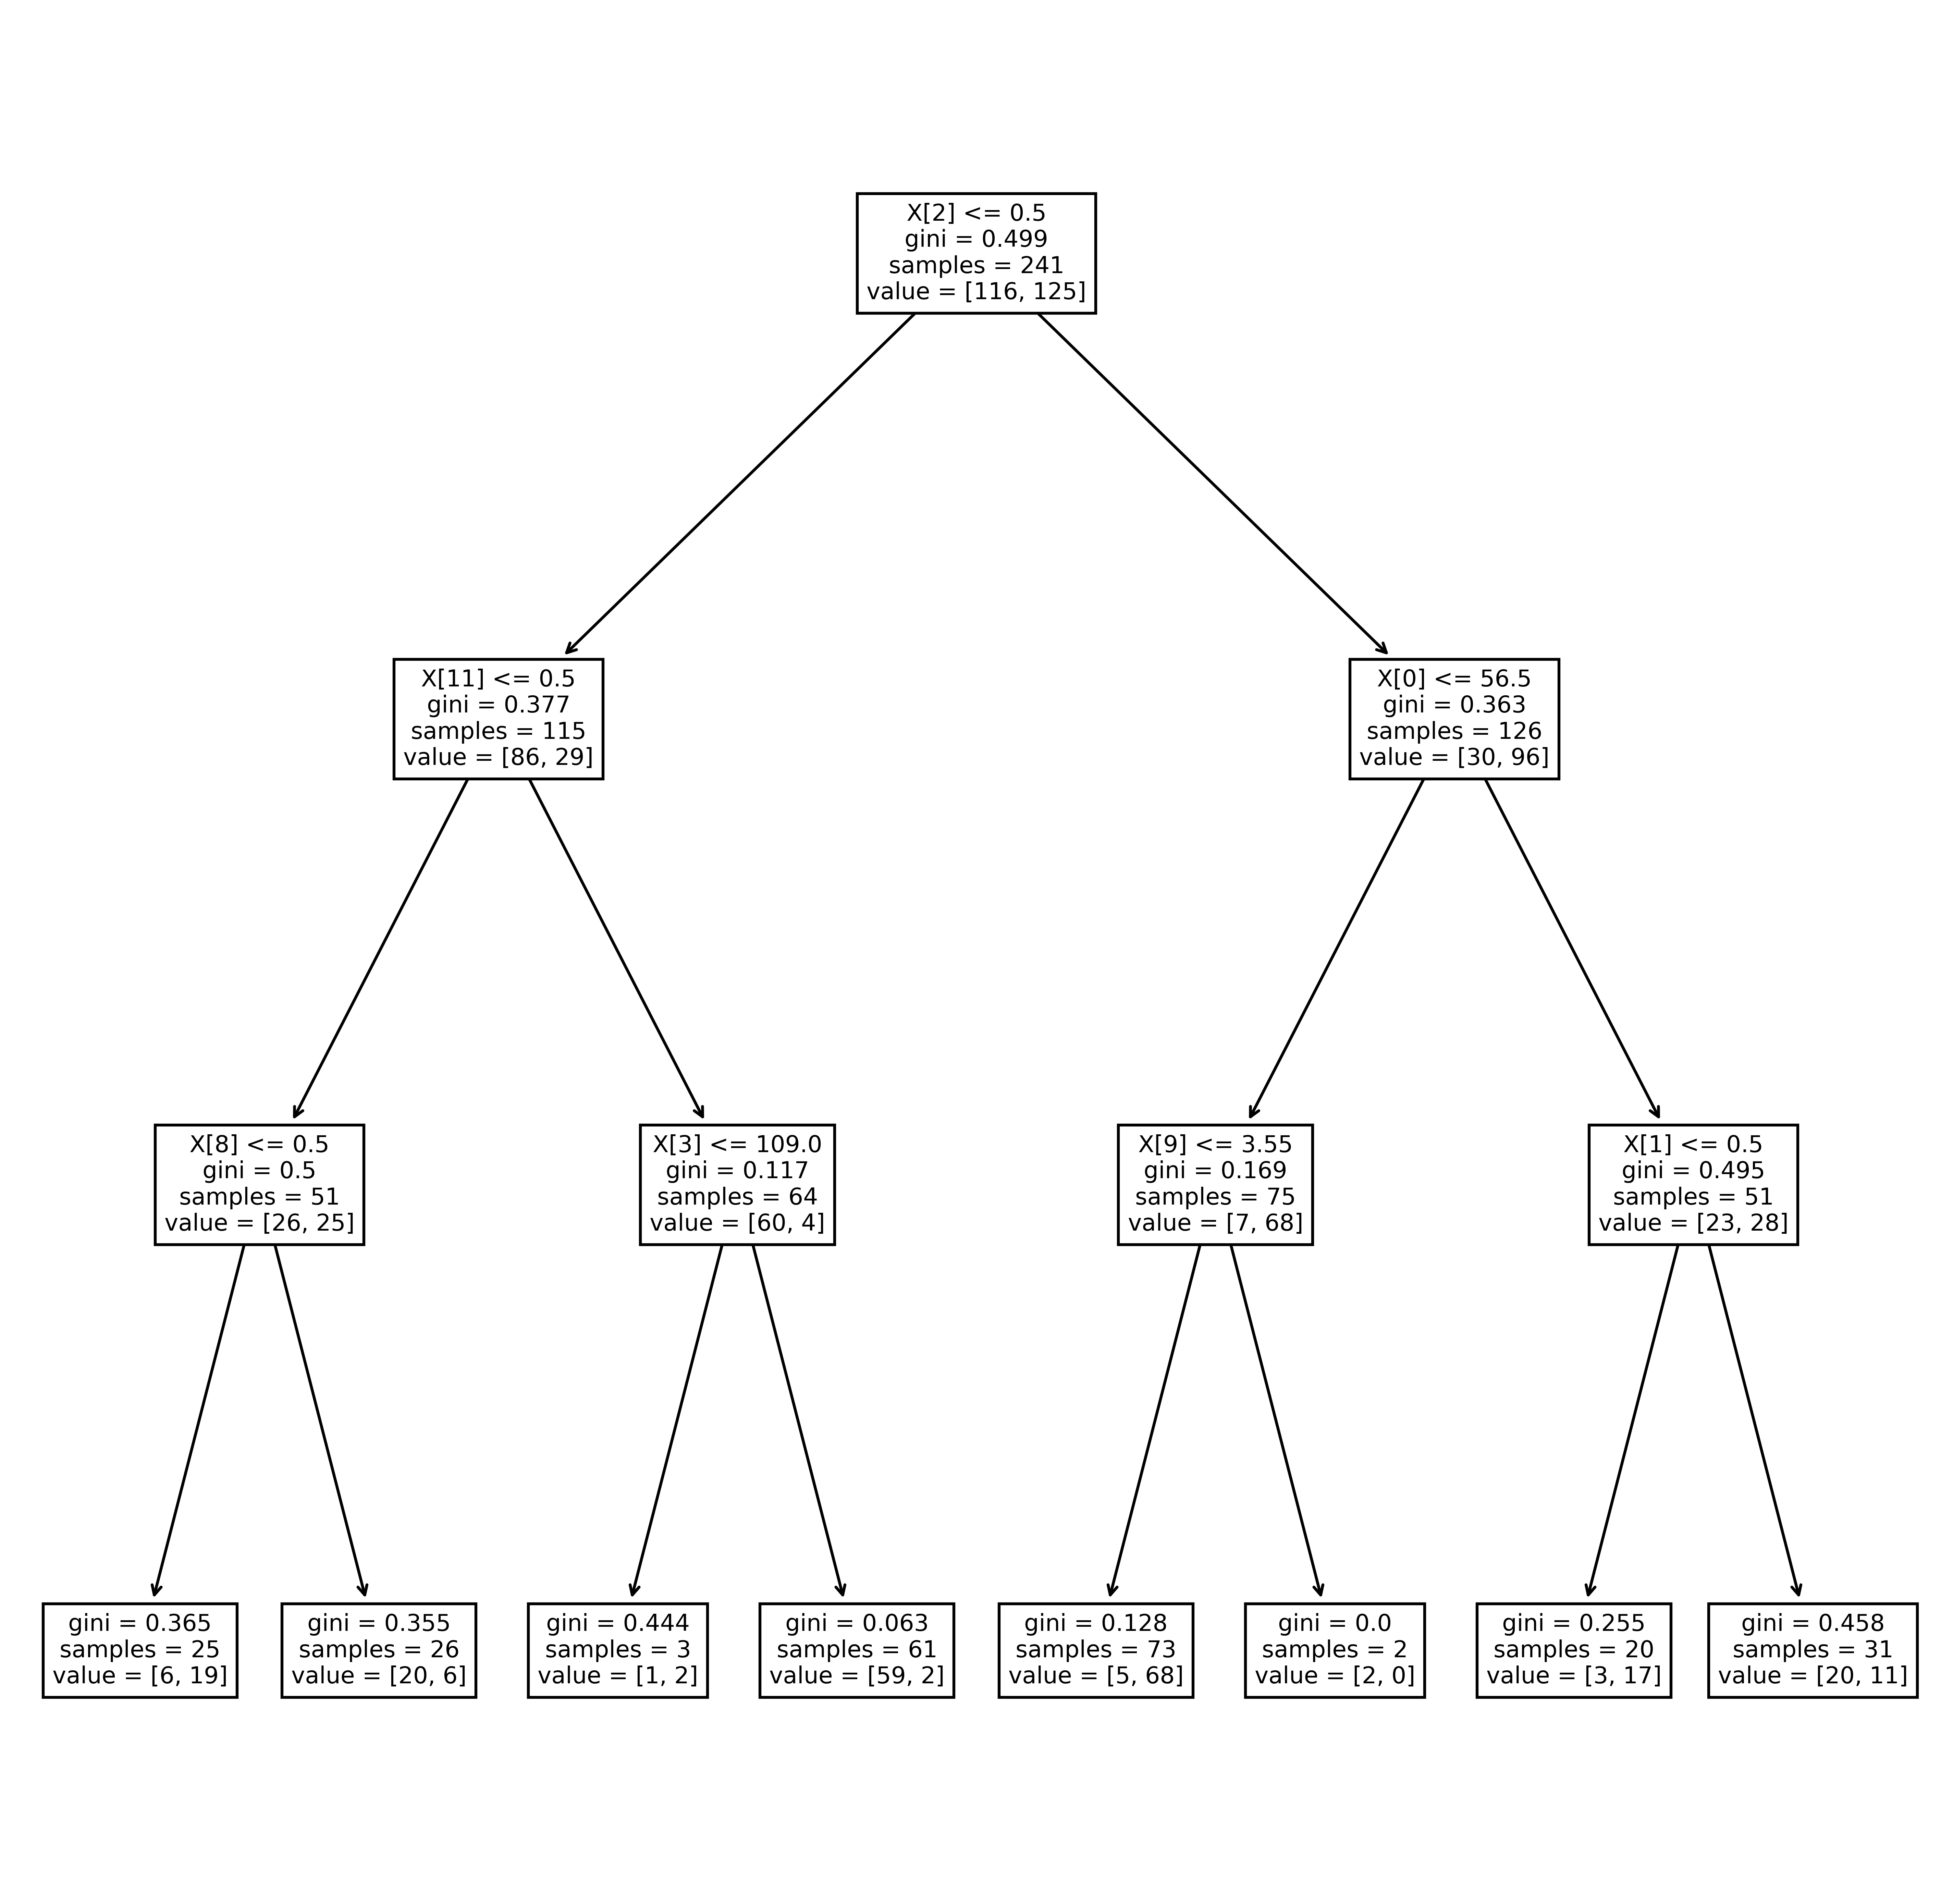

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12),dpi=600)
plot_tree(dtree);

WE CHANGED THE MAX DEPTH VALUE ABOVE

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_leaf_nodes=2)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=2)

In [32]:
print (f'Train Accuracy - : {dtree.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {dtree.score(X_test,y_test):.3f}')

Train Accuracy - : 0.755
Test Accuracy - : 0.770


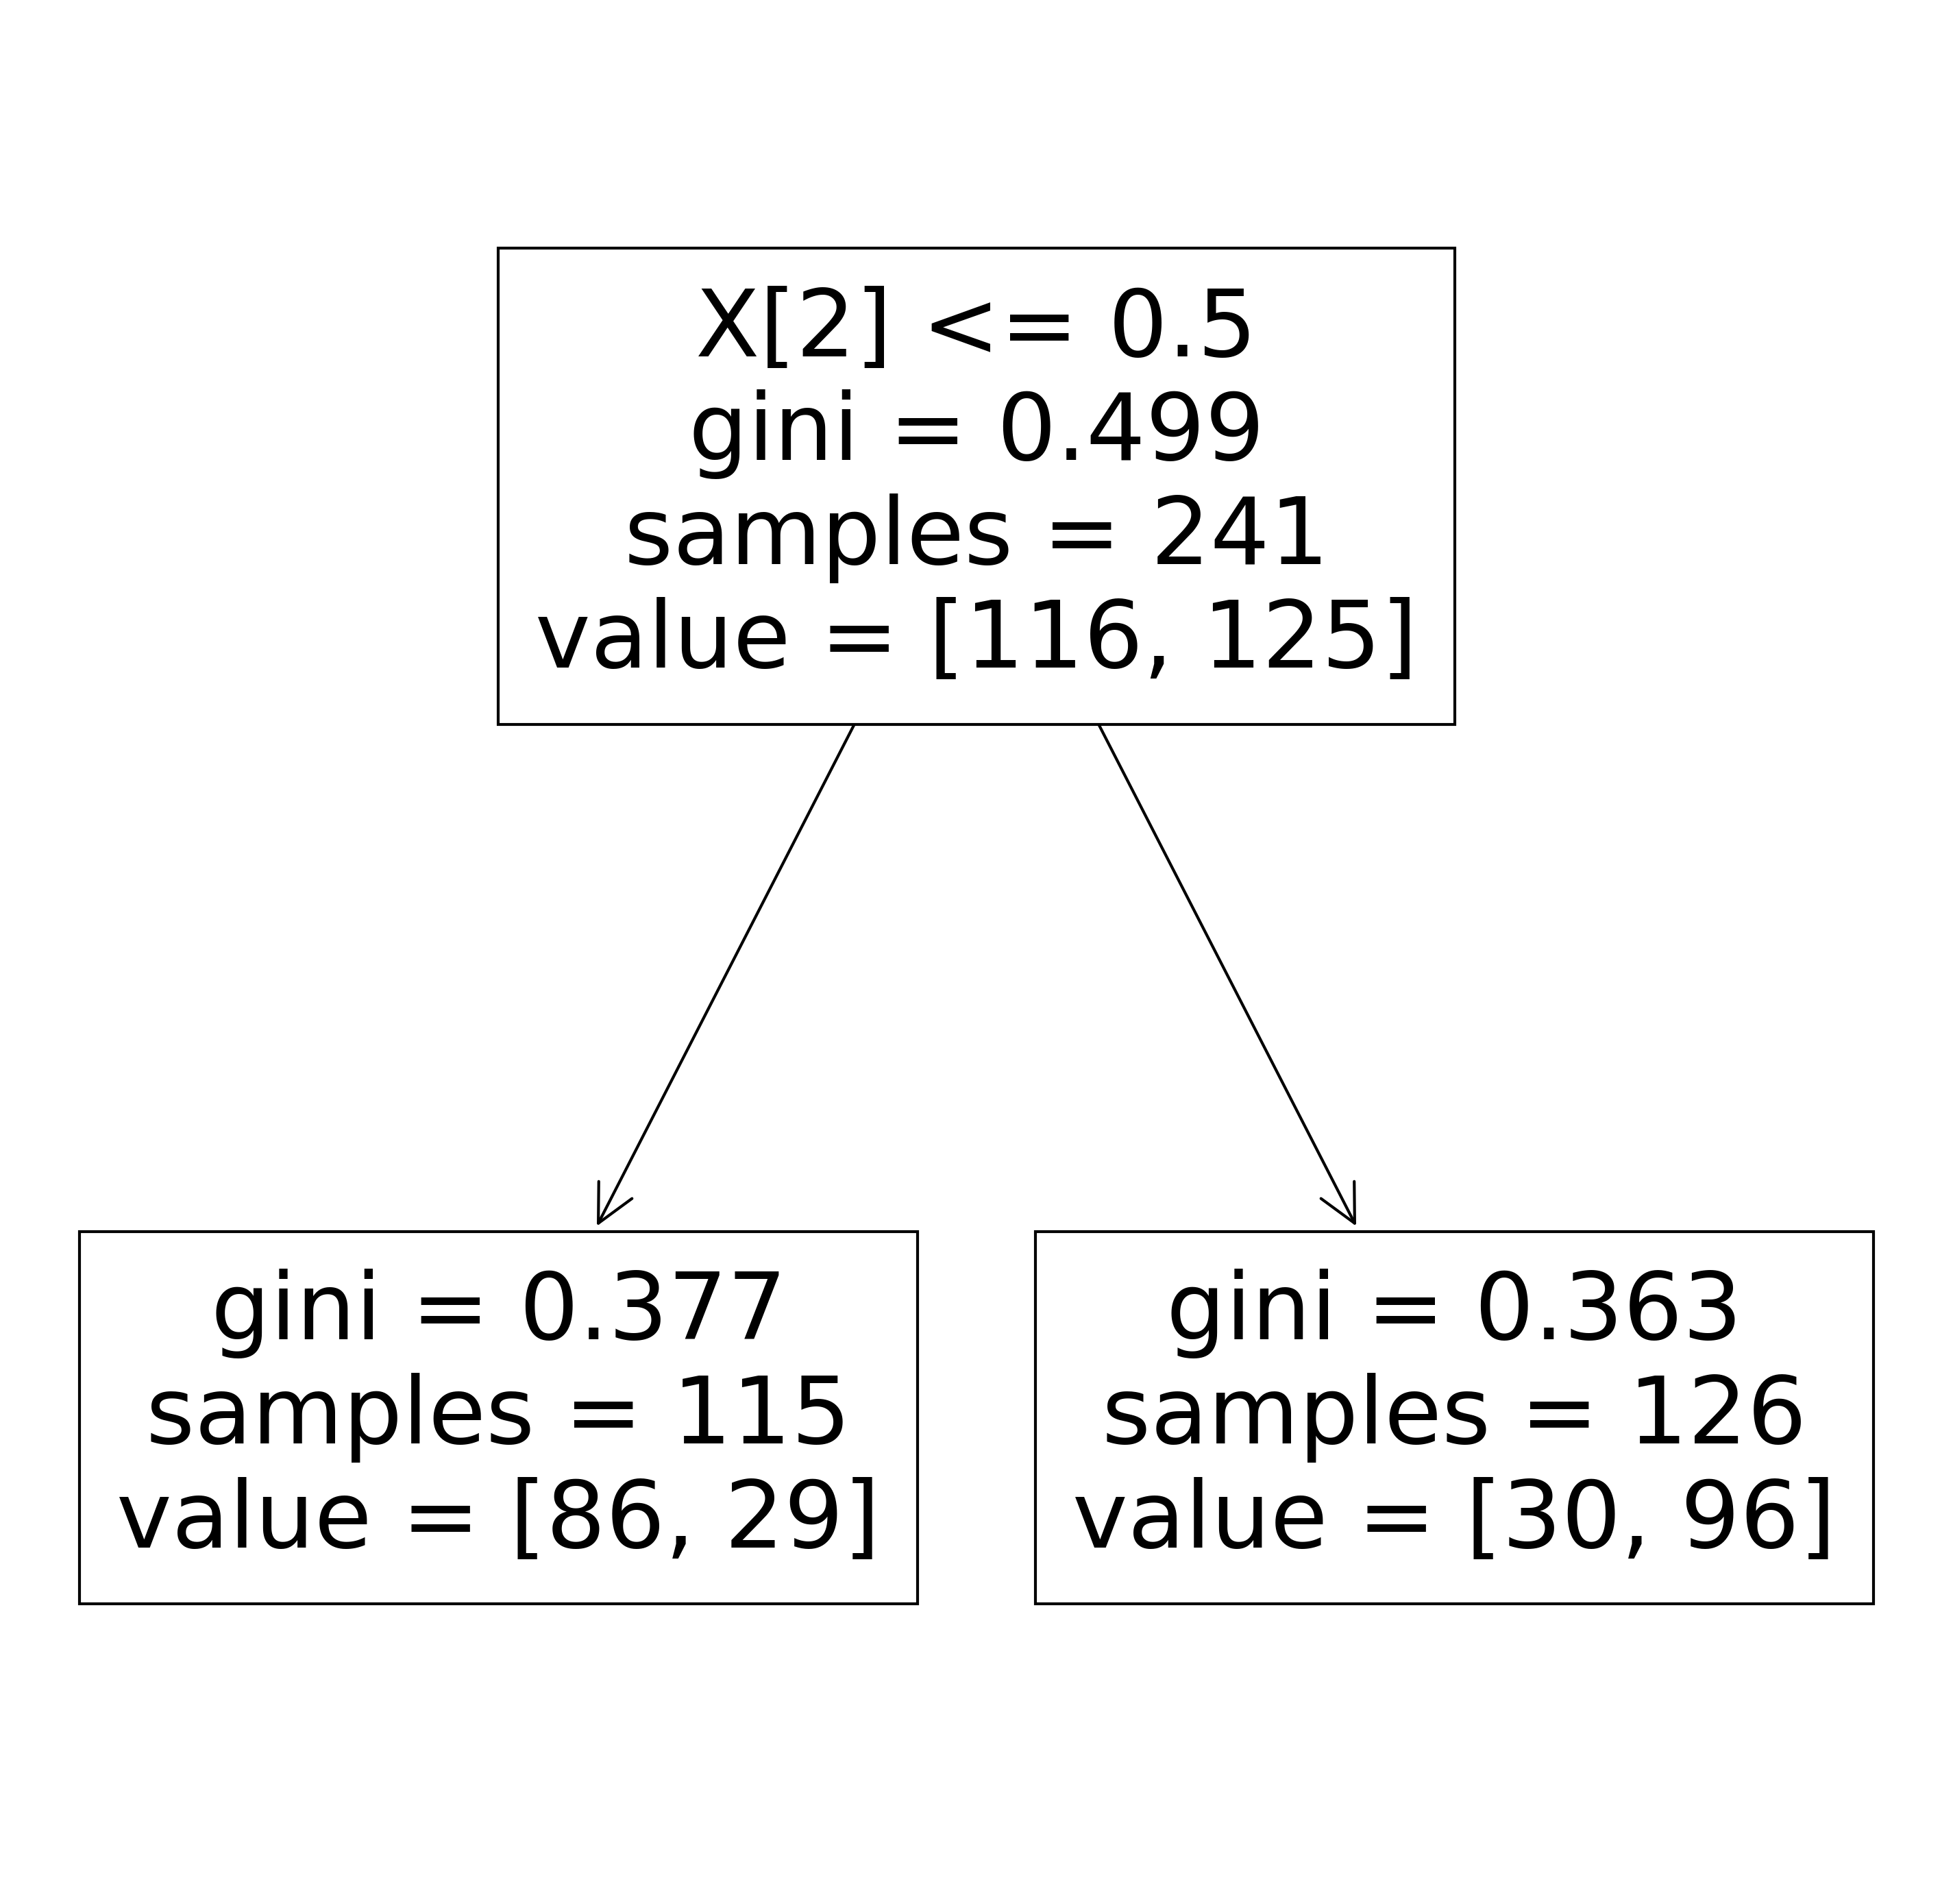

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12),dpi=300)
plot_tree(dtree);

CHANGING THE PARAMETER MAX LEAVES